**HIRING TEST TEACHING ASSISTANT - PACMANN**

oleh: Amid Rakhman

Problem : Klasifikasi Kualitas Anggur Merah

Tujuan : Membuat model untuk mengklasifikasi kualitas dari anggur merah

Link Dataset : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler  
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

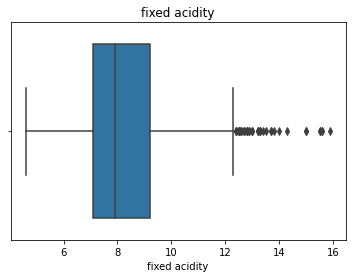

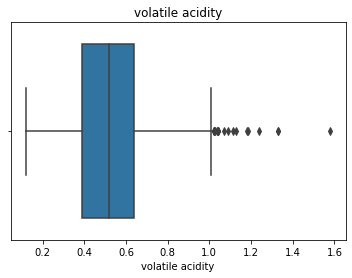

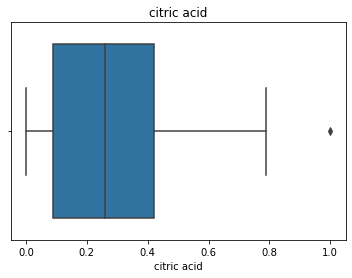

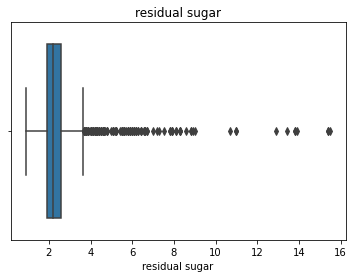

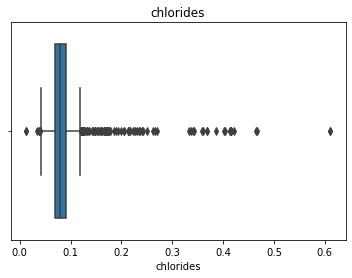

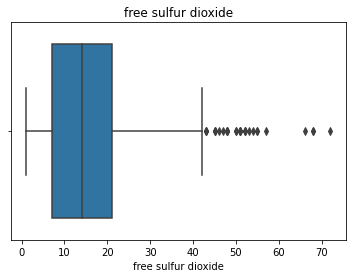

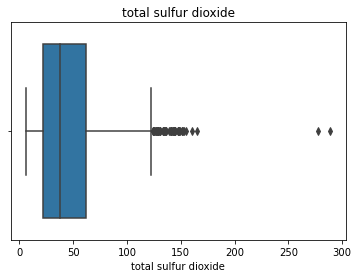

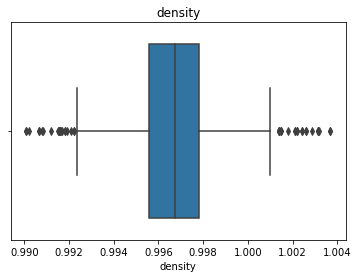

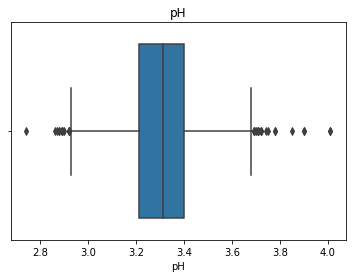

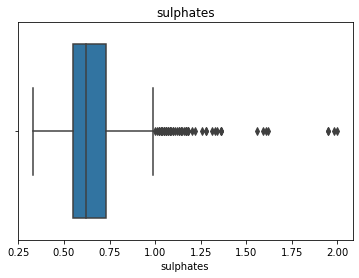

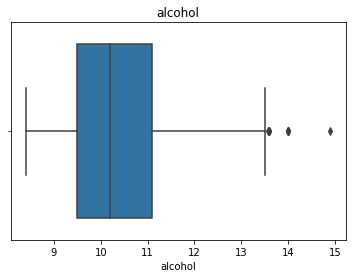

In [8]:
column = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',	'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in column:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

Cek nilai batas bawah dan atas fixed acidity

In [9]:
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1

bb_fa = Q1 - (1.5*IQR)
ba_fa = Q3 + (1.5*IQR)

print('Batas Bawah: ', bb_fa)
print('Batas Atas: ', ba_fa)

Batas Bawah:  3.95
Batas Atas:  12.349999999999998


Cek data yang berada dibawah Batas Bawah | diatas Batas Atas

In [10]:
df[df['fixed acidity'] < bb_fa ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [11]:
df[df['fixed acidity'] > ba_fa]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Ganti nilai outlier yang lebih dari batas atas dengan nilai batas atas

In [12]:
df['fixed acidity'] = df['fixed acidity'].mask(df['fixed acidity']>ba_fa, ba_fa)

Cek kembali data yang outlier

In [13]:
df[df['fixed acidity'] > ba_fa]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Cek hasil penggantian nilai outlier

In [14]:
df[df['fixed acidity'] == ba_fa]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.35,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.35,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,12.35,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,12.35,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.35,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,12.35,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,12.35,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.35,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.35,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,12.35,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Cek Outlier pada 'volatile acidity'

In [17]:
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
bb_va = Q1 - (1.5*IQR)
ba_va = Q3 + (1.5*IQR)

print('Batas Bawah: ', bb_va)
print('Batas Atas: ', ba_va)

df[(df['volatile acidity'] < bb_va) | (df['volatile acidity'] > ba_va)]

Batas Bawah:  0.015000000000000013
Batas Atas:  1.0150000000000001


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


Ganti nilai outlier dengan batas atas

In [20]:
df['volatile acidity'] = df['volatile acidity'].mask(df['volatile acidity']>ba_va, ba_va)

Cek data oulier kembali

In [21]:
df[(df['volatile acidity'] < bb_va) | (df['volatile acidity'] > ba_va)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Cek Outlier pada citric acid

In [24]:
Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1
bb_ca = Q1 - (1.5*IQR)
ba_ca = Q3 + (1.5*IQR)

print('Batas Bawah: ', bb_ca)
print('Batas Atas: ', ba_ca)

df[(df['citric acid'] < bb_ca) | (df['citric acid'] > ba_ca)]

Batas Bawah:  -0.4049999999999999
Batas Atas:  0.9149999999999999


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


Ganti dan cek kembali

In [25]:
df['citric acid'] = df['citric acid'].mask(df['citric acid']>ba_ca, ba_ca)

df[(df['citric acid'] < bb_ca) | (df['citric acid'] > ba_ca)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.655860,0.174045,0.194614,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Penanganan Outlier pada residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol

In [28]:
Q1 = (df[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]).quantile(0.25)
Q3 = (df[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]).quantile(0.75)
IQR = Q3 - Q1

bb = Q1 - (1.5*IQR)
print('Nilai Batas Bawah dari masing-masing Feature adalah: ')
print(bb)

ba = Q3 + (1.5*IQR)
print('\nNilai Batas Atas dari masing-masing Feature adalah: ')
print(ba)

kecil = (df < bb)
besar = (df > ba)

df = df.mask(kecil, bb, axis=1)
df = df.mask(besar, ba, axis=1)


Nilai Batas Bawah dari masing-masing Feature adalah: 
residual sugar           0.850000
chlorides                0.040000
free sulfur dioxide    -14.000000
total sulfur dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
dtype: float64
Nilai Batas Atas dari masing-masing Feature adalah: 
residual sugar            3.650000
chlorides                 0.120000
free sulfur dioxide      42.000000
total sulfur dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.636023
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,8.000000


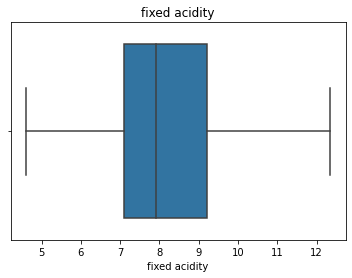

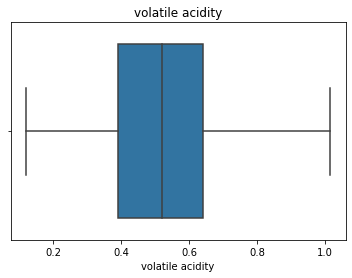

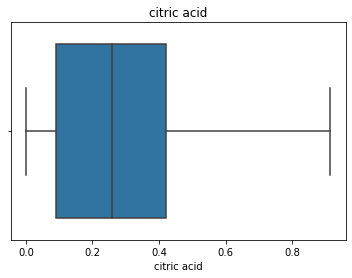

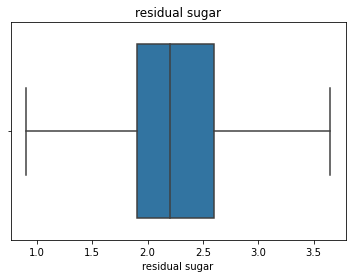

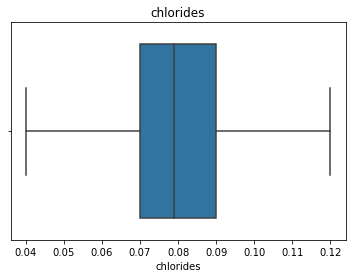

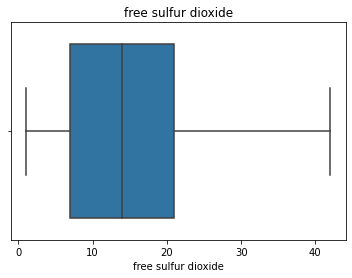

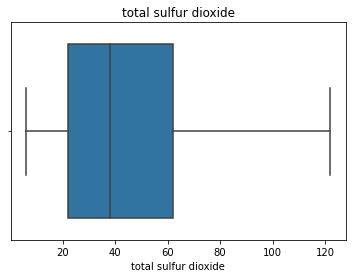

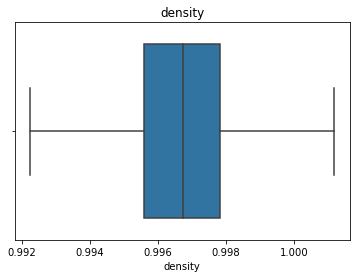

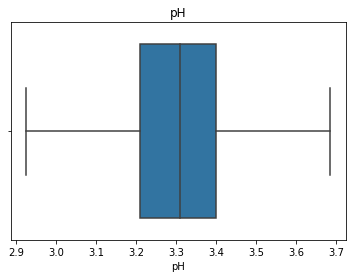

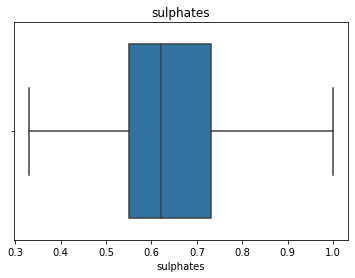

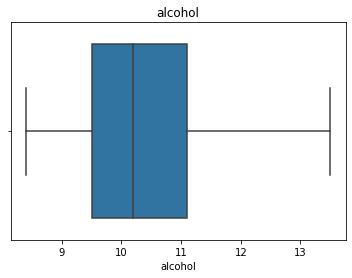

In [29]:
column = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',	'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in column:
    #plt.figure()
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.636023
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,8.000000


In [33]:
 scaler = MinMaxScaler()  

column = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',	'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
 
df[column] = scaler.fit_transform(df[column])

In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.476245,0.454111,0.296090,0.517221,0.514931,0.358273,0.342369,0.502795,0.507044,0.477360,0.396005,5.636023
std,0.213659,0.194463,0.212692,0.221634,0.222780,0.239939,0.261845,0.202025,0.197173,0.204606,0.206825,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.322581,0.301676,0.098361,0.363636,0.375000,0.146341,0.137931,0.375000,0.375000,0.328358,0.215686,5.000000
50%,0.425806,0.446927,0.284153,0.472727,0.487500,0.317073,0.275862,0.503635,0.506579,0.432836,0.352941,6.000000
75%,0.593548,0.581006,0.459016,0.618182,0.625000,0.487805,0.482759,0.625000,0.625000,0.597015,0.529412,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,5
1,0.412903,0.849162,0.000000,0.618182,0.7250,0.585366,0.525862,0.509228,0.361842,0.522388,0.274510,5
2,0.412903,0.715084,0.043716,0.509091,0.6500,0.341463,0.413793,0.531600,0.440789,0.477612,0.274510,5
3,0.851613,0.178771,0.612022,0.363636,0.4375,0.390244,0.465517,0.643456,0.309211,0.373134,0.274510,6
4,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,5


In [37]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

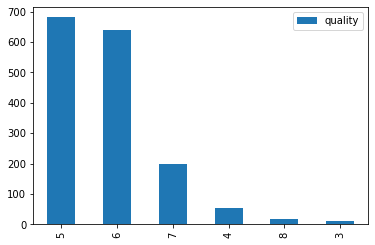

In [52]:
df['quality'].value_counts().plot(kind='bar')
#df['quality'].value_counts().plot(kind='pie')
plt.legend()
plt.show()

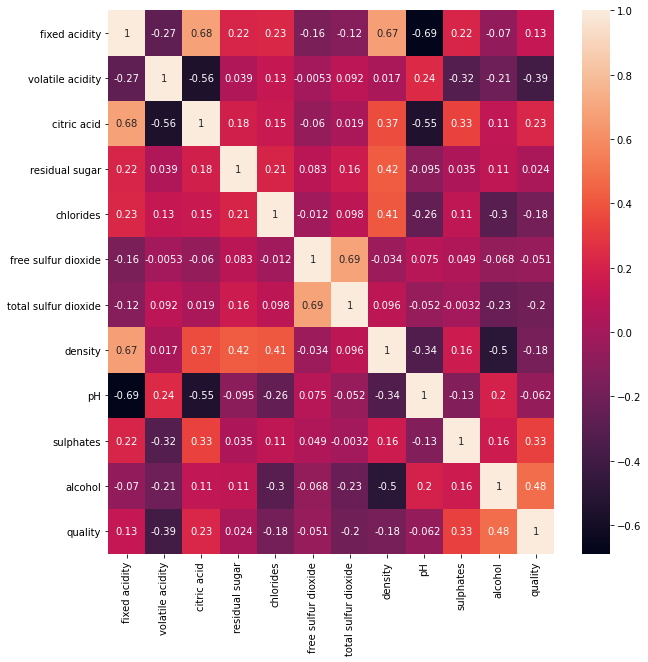

In [75]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = df.drop(['quality'], axis = 1)
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

akurasi = accuracy_score(y_test, y_pred)

print("Akurasi KNN : ", akurasi)

Akurasi KNN :  0.5395833333333333


In [82]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree = decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

akurasi2 = accuracy_score(y_test, y_pred)

print("Akurasi Decission Tree :", akurasi2)



Akurasi Decission Tree : 0.5916666666666667


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression(solver='liblinear')
logreg = logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

akurasi3 = accuracy_score(y_test, y_pred)

print("Akurasi Logistic Regression :", akurasi3)

print("\nPrint Confusion matrix dan classification report")

print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)

Akurasi Logistic Regression : 0.625

Print Confusion matrix dan classification report
Confusion matrix:
[[  0   0   3   0   0   0]
 [  0   0  10   5   0   0]
 [  0   0 160  47   1   0]
 [  0   0  64 130  10   0]
 [  0   0   4  31  10   0]
 [  0   0   0   3   2   0]]
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.66      0.77      0.71       208
           6       0.60      0.64      0.62       204
           7       0.43      0.22      0.29        45
           8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.58      0.62      0.60       480



C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
